In [74]:
import os
from tqdm import tqdm

import databento as db
import pandas as pd
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

In [75]:
api_key_path = r"C:\Users\natha\OneDrive\Desktop\databento_key.txt"
api_key = open(api_key_path, "r").read()
client = db.Historical(api_key)

In [76]:
data = client.timeseries.get_range(
    dataset='GLBX.MDP3',
    symbols=['ES.FUT','ZF.FUT','CL.FUT'],
    stype_in='parent',
    schema='ohlcv-1d',
    start='2018-10-01',
    end='2023-10-01',
)

#data.replay(print)

In [77]:
df = data.to_df()
df.head()

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
ts_event,,,,,,,,,
2018-10-01 00:00:00+00:00,35,1,119520,4.06,4.54,4.02,4.49,4709,CLZ9-CLZ0
2018-10-01 00:00:00+00:00,35,1,9719,2.56,2.71,2.52,2.67,8,CLZ8-CLV9
2018-10-01 00:00:00+00:00,35,1,37827,-8.61,-8.35,-8.62,-8.42,527,CLZ9-BZZ9
2018-10-01 00:00:00+00:00,35,1,64810,0.97,0.98,0.85,0.94,598,CLZ8-CLK9
2018-10-01 00:00:00+00:00,35,1,148313,-0.05,-0.05,-0.05,-0.05,1,CL:BF M9-U9-Z9


In [78]:
# remove rows where symbol has "-" in it
df = df[~df['symbol'].str.contains('-|:')]
# convert datetime index to nanosecond epoch time
df.index = df.index.astype('int64')
df.index.name = 'epoch'
df.reset_index(inplace=True)
df.head()

,epoch,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
0,1538352000000000000,35,1,22770,69.13,69.13,69.13,69.13,10,CLK0
1,1538352000000000000,35,1,97456,72.47,74.86,72.21,74.51,1083,CLJ9
2,1538352000000000000,35,1,694785,72.41,74.55,72.04,74.24,520,CLK9
3,1538352000000000000,35,1,492615,64.20,64.20,64.20,64.20,1,CLN1
4,1538352000000000000,35,1,310036,71.45,73.36,71.34,73.36,26,CLQ9


In [79]:
df["symbol"].unique()

array(['CLK0', 'CLJ9', 'CLK9', 'CLN1', 'CLQ9', 'CLX8', 'CLZ5', 'ZFH9',
       'ESM9', 'CLZ0', 'CLZ8', 'CLG0', 'CLM0', 'CLF9', 'CLZ2', 'CLZ1',
       'CLN9', 'CLZ3', 'CLH9', 'CLV9', 'CLG9', 'ESH9', 'CLU9', 'CLM1',
       'CLM9', 'CLZ9', 'ZFZ8', 'ESZ8', 'CLH0', 'CLF0', 'CLX9', 'CLQ0',
       'ESU9', 'CLZ4', 'CLV0', 'CLX0', 'CLJ0', 'CLN0', 'CLM2', 'CLV1',
       'CLM4', 'CLM3', 'ESZ9', 'CLU0', 'CLF1', 'ZFM9', 'ESH0', 'CLZ6',
       'CLH1', 'CLG8', 'CLK7', 'CLV7', 'CLZ7', 'ESM0', 'ZFU9', 'CLG1',
       'CLF8', 'CLX1', 'CLU1', 'CLU2', 'CLJ1', 'CLK1', 'CLQ1', 'CLX7',
       'ZFZ9', 'ESU0', 'CLF2', 'CLK3', 'CLG3', 'CLH3', 'CLJ3', 'CLN3',
       'ESZ0', 'ZFH0', 'CLK2', 'CLG2', 'CLM5', 'CLH2', 'CLJ2', 'ZFM0',
       'ESH1', 'CLN2', 'CLJ30', 'CLG4', 'CLX2', 'CLQ2', 'CLV2', 'ZFU0',
       'ESM1', 'CLF3', 'CLU3', 'CLX3', 'ESU1', 'ZFZ0', 'CLQ3', 'ESZ1',
       'ZFH1', 'ZFM1', 'CLG6', 'CLF4', 'CLH4', 'CLN4', 'CLK4', 'CLX4',
       'CLF5', 'CLZ30', 'ESH2', 'CLF6', 'CLF7', 'ESM2', 'ZFU1', 'CLZ31',
   

In [80]:
symbols = ["ESU9","ESM0"]
df_sub = df[df["symbol"].isin(symbols)]

grouped = df_sub.groupby("symbol")
symbol_dfs = {symbol: group for symbol, group in grouped}
# get shapes 
shapes = {symbol: group.shape for symbol, group in grouped}
shapes


{'ESM0': (261, 10), 'ESU9': (251, 10)}

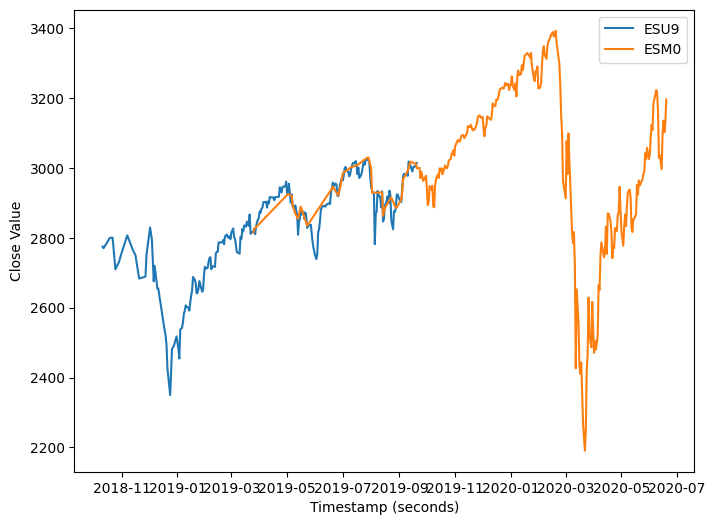

In [82]:
df_sub1 = symbol_dfs[symbols[0]]
df_sub2 = symbol_dfs[symbols[1]]

# Convert the "epoch" column to a Pandas datetime object
df_sub1["t"] =  pd.to_datetime(df_sub1["epoch"].astype('int64'))
df_sub2["t"] =  pd.to_datetime(df_sub2["epoch"].astype('int64'))

fig = plt.figure(figsize=(8, 6))

# Plot "close" values against the timestamp for both DataFrames
plt.plot(df_sub1["t"], df_sub1["close"], label=symbols[0])
plt.plot(df_sub2["t"], df_sub2["close"], label=symbols[1])

# Optionally, you can set labels for the axes
plt.xlabel("Timestamp (seconds)")
plt.ylabel("Close Value")

# Add a legend to differentiate between the two DataFrames
plt.legend()

# Show the plot
plt.show()

In [83]:
tickers = df["symbol"].unique()

path = r"C:\Users\natha\OneDrive\Desktop\C++\AgisCoreTest\data\FUTURES_DAILY"
_path = os.path.join(path, "data.h5")

# remove file if it already exists
if os.path.exists(_path):
    os.remove(_path)

for ticker in tqdm(tickers):
    with h5.File(_path, "a") as file:
        # Convert the DataFrame to a NumPy array
        rows = df[df['symbol'] == ticker].copy()
        rows.sort_values(by='epoch', inplace=True)
        cols = ["open","high","low","close","volume"]
        data = rows[cols].to_numpy()

        # Create a new dataset and save the data
        file.create_dataset(f"{ticker}/datetime", data=rows["epoch"].to_numpy())
        dataset = file.create_dataset(f"{ticker}/data", data=data)

        # Store column names as attributes
        for col_name in cols:
            dataset.attrs[col_name] = col_name

  0%|          | 0/155 [00:00<?, ?it/s]

100%|██████████| 155/155 [00:00<00:00, 198.43it/s]


In [84]:
# find all tickers that start with "CL"
tickers = [ticker for ticker in tickers if ticker.startswith("CL")]
# for each ticker, get all rows and calculate the rolling 50 day volatility
dfs = []
for ticker in tickers:
    df_sub = df[df["symbol"] == ticker].copy()
    df_sub["volatility"] = df_sub["close"].rolling(50).std()
    df_sub.set_index("epoch", inplace=True)
    dfs.append(df_sub)

# concatenate all the DataFrames by joining on the index
result_df = pd.concat(dfs)
result_df.tail()

,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol,volatility
epoch,,,,,,,,,,
1691625600000000000,35,1,432669,71.80,71.80,71.80,71.80,1,CLX5,NaN
1692057600000000000,35,1,432669,70.50,70.50,70.50,70.50,1,CLX5,NaN
1690502400000000000,35,1,655565,70.60,70.60,70.60,70.60,10,CLV5,NaN
1691625600000000000,35,1,655565,72.00,72.00,72.00,72.00,2,CLV5,NaN
1692057600000000000,35,1,655565,70.75,70.75,70.75,70.75,2,CLV5,NaN


In [85]:
#fig = plt.figure(figsize=(12, 8))
#plt.plot(result_df.index, result_df["volatility"])

In [90]:
ticker = "CLF9"
x = df[df["symbol"] == ticker]
x["epoch"] = pd.to_datetime(x["epoch"].astype('int64'))
x

C:\Users\natha\AppData\Local\Temp\ipykernel_13340\3527534806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["epoch"] = pd.to_datetime(x["epoch"].astype('int64'))


,epoch,rtype,publisher_id,instrument_id,open,high,low,close,volume,symbol
13,2018-10-01,35,1,110955,73.13,75.42,72.61,75.17,11850,CLF9
35,2018-10-02,35,1,110955,75.16,75.54,74.65,74.86,7005,CLF9
65,2018-10-03,35,1,110955,74.87,76.55,73.95,75.83,14985,CLF9
84,2018-10-04,35,1,110955,75.84,76.16,73.69,74.56,14317,CLF9
118,2018-10-05,35,1,110955,74.53,75.02,73.65,74.10,10271,CLF9
...,...,...,...,...,...,...,...,...,...,...
1566,2018-12-14,35,1,110955,52.83,52.83,50.84,51.23,432060,CLF9
1583,2018-12-16,35,1,110955,51.25,51.39,51.25,51.32,978,CLF9
1602,2018-12-17,35,1,110955,51.32,51.87,49.01,49.33,123646,CLF9
1634,2018-12-18,35,1,110955,49.33,49.59,45.79,46.30,38724,CLF9


In [87]:
df["symbol"].unique()

array(['CLK0', 'CLJ9', 'CLK9', 'CLN1', 'CLQ9', 'CLX8', 'CLZ5', 'ZFH9',
       'ESM9', 'CLZ0', 'CLZ8', 'CLG0', 'CLM0', 'CLF9', 'CLZ2', 'CLZ1',
       'CLN9', 'CLZ3', 'CLH9', 'CLV9', 'CLG9', 'ESH9', 'CLU9', 'CLM1',
       'CLM9', 'CLZ9', 'ZFZ8', 'ESZ8', 'CLH0', 'CLF0', 'CLX9', 'CLQ0',
       'ESU9', 'CLZ4', 'CLV0', 'CLX0', 'CLJ0', 'CLN0', 'CLM2', 'CLV1',
       'CLM4', 'CLM3', 'ESZ9', 'CLU0', 'CLF1', 'ZFM9', 'ESH0', 'CLZ6',
       'CLH1', 'CLG8', 'CLK7', 'CLV7', 'CLZ7', 'ESM0', 'ZFU9', 'CLG1',
       'CLF8', 'CLX1', 'CLU1', 'CLU2', 'CLJ1', 'CLK1', 'CLQ1', 'CLX7',
       'ZFZ9', 'ESU0', 'CLF2', 'CLK3', 'CLG3', 'CLH3', 'CLJ3', 'CLN3',
       'ESZ0', 'ZFH0', 'CLK2', 'CLG2', 'CLM5', 'CLH2', 'CLJ2', 'ZFM0',
       'ESH1', 'CLN2', 'CLJ30', 'CLG4', 'CLX2', 'CLQ2', 'CLV2', 'ZFU0',
       'ESM1', 'CLF3', 'CLU3', 'CLX3', 'ESU1', 'ZFZ0', 'CLQ3', 'ESZ1',
       'ZFH1', 'ZFM1', 'CLG6', 'CLF4', 'CLH4', 'CLN4', 'CLK4', 'CLX4',
       'CLF5', 'CLZ30', 'ESH2', 'CLF6', 'CLF7', 'ESM2', 'ZFU1', 'CLZ31',
   